# データサイエンス 第5回

In [ ]:
# 必要に応じて次の行のコメントアウトを解除し，ライブラリをインストールしてください
!pip install geopandas matplotlib numpy pandas pyserial requests japanize-matplotlib scikit-learn setuptools 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
import scipy.stats as stats

%matplotlib inline 

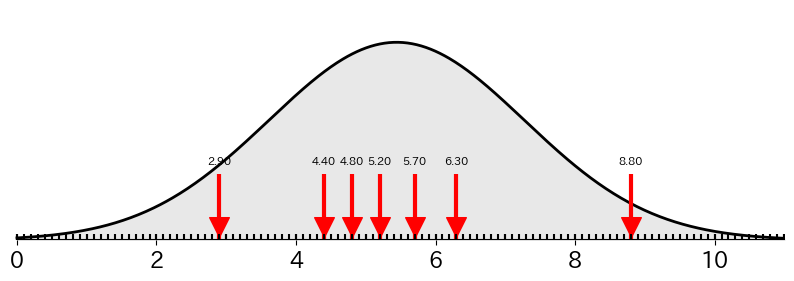

In [7]:
X = [2.9, 5.7, 8.8, 4.4, 6.3, 4.8, 5.2]

xmin, xmax = 0, 11 

fig, ax = plt.subplots(figsize=(10, 3))
fig.subplots_adjust(hspace=0.7)

sample_mean = np.mean(X)
s = np.sqrt(np.var(X, ddof=1))

x_values = np.linspace(xmin, xmax, 500)
y_values = stats.norm.pdf(x_values, sample_mean, s)

ax.fill_between(x_values, y_values / max(y_values) * 0.03, color='lightgray', alpha=0.5, label='Original Distribution')

ax.plot(x_values, y_values / max(y_values) * 0.03, color='black', linewidth=2)

ax.scatter(X, [0.002] * len(X), marker='v', c='r', s=200, alpha=1, label='Samples')

ax.vlines(x=X, ymin=0, ymax=0.01, colors='r', linewidth=3)

for x in X:
    ax.text(x, 0.012, f"{x:.2f}", fontsize=8, ha='center', va='center')

ax.hlines(y=0, xmin=xmin, xmax=xmax, colors='k')
ax.vlines(x=[i for i in range(xmin, xmax + 1, 1)], ymin=0, ymax=0.001, colors='k')
ax.vlines(x=[i / 10 for i in range(xmin * 10, xmax * 10 + 1, 1)], ymin=0, ymax=0.001, colors='k')

ax.tick_params(labelbottom=True, bottom=True, labelleft=False, left=False, labelsize=16)
ax.set_xlim(xmin - 0.1, xmax + 0.01)
ax.set_ylim(0, 0.035)
ax.set_frame_on(False)

plt.show()

### 標本平均 $\bar{x}$ の計算

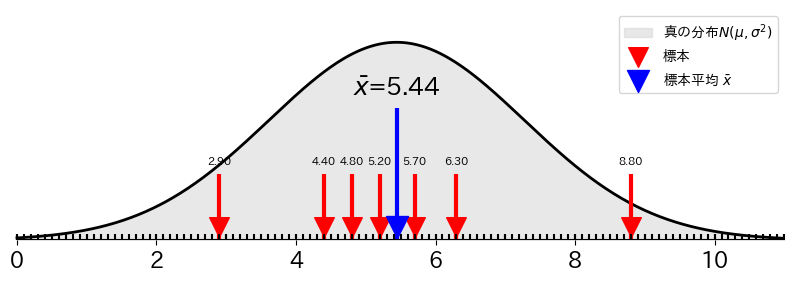

In [8]:
X = [2.9, 5.7, 8.8, 4.4, 6.3, 4.8, 5.2]

xmin, xmax = 0, 11

fig, ax = plt.subplots(figsize=(10, 3))
fig.subplots_adjust(hspace=0.7)

sample_mean = np.mean(X)
s = np.sqrt(np.var(X, ddof=1))

x_values = np.linspace(xmin, xmax, 500)
y_values = stats.norm.pdf(x_values, sample_mean, s)

ax.fill_between(x_values, y_values / max(y_values) * 0.03, color='lightgray', alpha=0.5, label=r'真の分布$N(\mu,\sigma^2)$')

ax.plot(x_values, y_values / max(y_values) * 0.03, color='black', linewidth=2)

ax.scatter(X, [0.002] * len(X), marker='v', c='r', s=200, alpha=1, label='標本')
ax.scatter(sample_mean, 0.002, marker='v', c='b', s=250, label=r'標本平均 $\bar{x}$')

ax.vlines(x=X, ymin=0, ymax=0.01, colors='r', linewidth=3)
ax.vlines(x=sample_mean, ymin=0, ymax=0.02, colors='b', linewidth=3)

ax.text(sample_mean, 0.023, r'$\bar{x}$'+f"={sample_mean:.2f}", fontsize=18, ha='center', va='center')

for x in X:
    ax.text(x, 0.012, f"{x:.2f}", fontsize=8, ha='center', va='center')

ax.hlines(y=0, xmin=xmin, xmax=xmax, colors='k')  # 横軸
ax.vlines(x=[i for i in range(xmin, xmax + 1, 1)], ymin=0, ymax=0.001, colors='k')
ax.vlines(x=[i / 10 for i in range(xmin * 10, xmax * 10 + 1, 1)], ymin=0, ymax=0.001, colors='k') 

ax.tick_params(labelbottom=True, bottom=True, labelleft=False, left=False, labelsize=16) 
ax.set_xlim(xmin - 0.1, xmax + 0.01)
ax.set_ylim(0, 0.035)
ax.set_frame_on(False)

ax.legend()
plt.show()

### 標本平均 $\bar{x}$ が従う正規分布 $N(\mu, \sigma^2/n)$

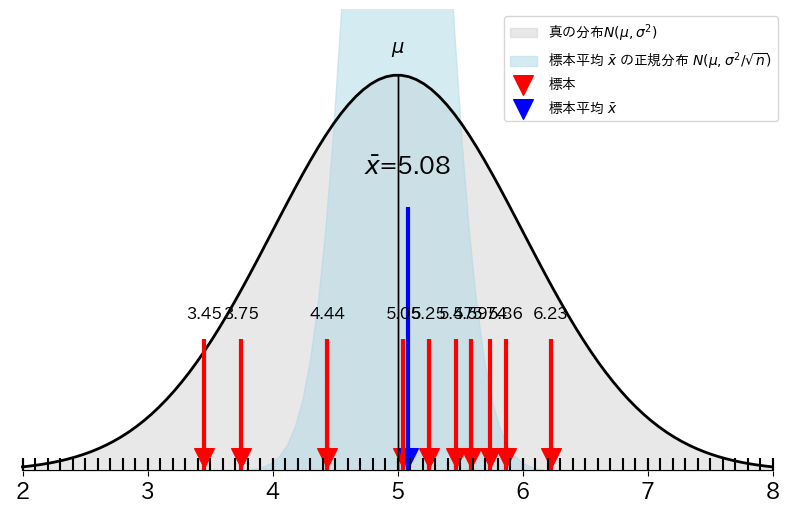

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(hspace=0.7)

xmin, xmax = 2, 8

n = 10
mu = 5
sigma = 1

X = np.random.normal(mu, sigma, n)

sample_mean = np.mean(X)
s = np.sqrt(np.var(X, ddof=1))

x_values = np.linspace(xmin, xmax, 100)
y_values = stats.norm.pdf(x_values, mu, sigma)

ax.fill_between(x_values, y_values / max(y_values) * 0.3, color='lightgray', alpha=0.5, label=r'真の分布$N(\mu,\sigma^2)$')
ax.plot(x_values, y_values / max(y_values) * 0.3, color='black', linewidth=2)
ax.vlines(x=mu, ymin=0, ymax=0.3, colors='k', linewidth=1)
ax.text(mu, 0.32, r'$\mu$', fontsize=14, ha='center', va='center')

x_sample_values = np.linspace(xmin, xmax, 100)
y_sample_values = stats.norm.pdf(x_values, mu, sigma/np.sqrt(n))

ax.fill_between(x_sample_values, y_sample_values / max(y_values) * 0.3, color='lightblue', alpha=0.5, label=r'標本平均 $\bar{x}$ の正規分布 $N(\mu,\sigma^2/\sqrt{n})$')

ax.scatter(X, [0.01] * len(X), marker='v', c='r', s=200, alpha=1, label='標本')
ax.scatter(sample_mean, 0.01, marker='v', c='b', s=200, label=r'標本平均 $\bar{x}$')

ax.vlines(x=X, ymin=0, ymax=0.1, colors='r', linewidth=3)
ax.vlines(x=sample_mean, ymin=0, ymax=0.2, colors='b', linewidth=3)

ax.vlines(x=mu, ymin=0, ymax=0.3, colors='k', linewidth=1)

ax.text(sample_mean, 0.23, r'$\bar{x}$'+f"={sample_mean:.2f}", fontsize=18, ha='center', va='center')

for x in X:
    ax.text(x, 0.12, f"{x:.2f}", fontsize=12, ha='center', va='center')

ax.hlines(y=0, xmin=xmin, xmax=xmax, colors='k')  # 横軸
ax.vlines(x=[i for i in range(xmin, xmax + 1, 1)], ymin=0, ymax=0.01, colors='k')  # 目盛り線（大）
ax.vlines(x=[i / 10 for i in range(xmin * 10, xmax * 10 + 1, 1)], ymin=0, ymax=0.01, colors='k')  # 目盛り線（小）

ax.tick_params(labelbottom=True, bottom=True, labelleft=False, left=False, labelsize=16)  # x軸設定
ax.set_xlim(xmin - 0.1, xmax + 0.1)
ax.set_ylim(0, 0.35)
ax.set_frame_on(False)

ax.legend()
plt.show()

 ### 標本サイズ $n$ を変化させた時の標本平均 $\bar{x}$ が従う正規分布 $N(\mu, \sigma^2/n)$

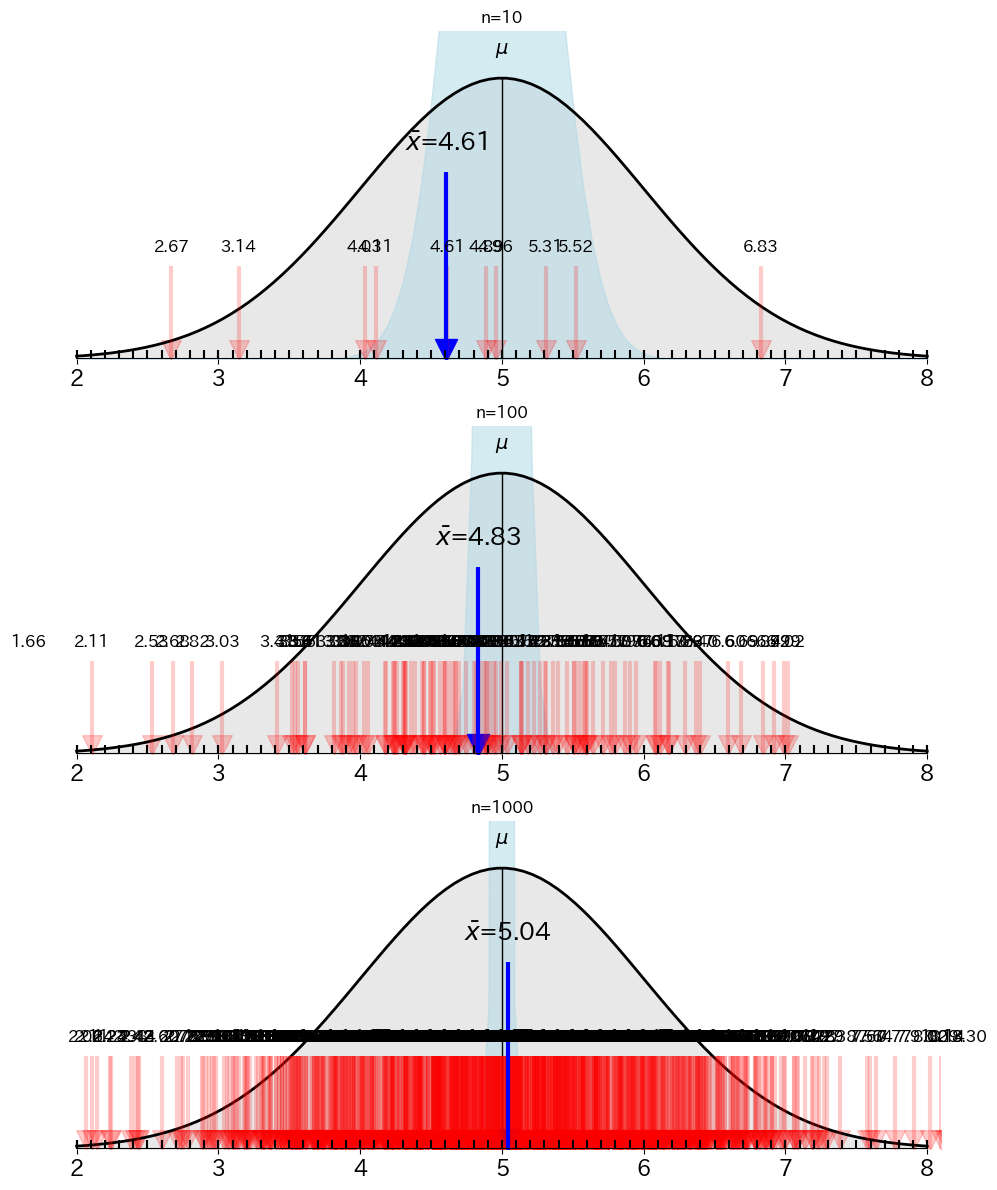

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_normal_distribution(ax, n, mu=5, sigma=1, xmin=2, xmax=8):
    X = np.random.normal(mu, sigma, n)

    sample_mean = np.mean(X)
    s = np.sqrt(np.var(X, ddof=1))

    x_values = np.linspace(xmin, xmax, 100)
    y_values = stats.norm.pdf(x_values, mu, sigma)

    ax.fill_between(x_values, y_values / max(y_values) * 0.3, color='lightgray', alpha=0.5, label=r'真の分布$N(\mu,\sigma^2)$')
    ax.plot(x_values, y_values / max(y_values) * 0.3, color='black', linewidth=2)
    ax.vlines(x=mu, ymin=0, ymax=0.3, colors='k', linewidth=1)
    ax.text(mu, 0.33, r'$\mu$', fontsize=14, ha='center', va='center')

    x_sample_values = np.linspace(xmin, xmax, 100)
    y_sample_values = stats.norm.pdf(x_values, mu, sigma/np.sqrt(n))

    ax.fill_between(x_sample_values, y_sample_values / max(y_values) * 0.3, color='lightblue', alpha=0.5, label=r'標本平均 $\bar{x}$ の正規分布 $N(\mu,\sigma^2/\sqrt{n})$')

    ax.scatter(X, [0.01] * len(X), marker='v', c='r', s=200, alpha=0.2, label='標本')
    ax.scatter(sample_mean, 0.01, marker='v', c='b', s=250, label=r'標本平均 $\bar{x}$')

    ax.vlines(x=X, ymin=0, ymax=0.1, colors='r', linewidth=3, alpha=0.2)
    ax.vlines(x=sample_mean, ymin=0, ymax=0.2, colors='b', linewidth=3)
   
    ax.text(sample_mean, 0.23, r'$\bar{x}$'+f"={sample_mean:.2f}", fontsize=18, ha='center', va='center')

    for x in X:
        ax.text(x, 0.12, f"{x:.2f}", fontsize=12, ha='center', va='center')

    ax.hlines(y=0, xmin=xmin, xmax=xmax, colors='k')
    ax.vlines(x=[i for i in range(xmin, xmax + 1, 1)], ymin=0, ymax=0.01, colors='k') 
    ax.vlines(x=[i / 10 for i in range(xmin * 10, xmax * 10 + 1, 1)], ymin=0, ymax=0.01, colors='k') 

    ax.tick_params(labelbottom=True, bottom=True, labelleft=False, left=False, labelsize=16)
    ax.set_xlim(xmin - 0.1, xmax + 0.1)
    ax.set_ylim(0, 0.35)
    ax.set_frame_on(False)
    ax.set_title(f'n={n}')

fig, axes = plt.subplots(3, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.7)

for ax, n in zip(axes, [10, 100, 1000]):
    plot_normal_distribution(ax, n)

plt.tight_layout()
plt.show()


<span style="font-size: 20px; color: #F08000;">[例題1] 母標準偏差 σ が既知のときの μ の 95% 信頼区間</span>

無作為に選んだ成人男性の身長を測定したところ、以下の通りとなった．
この標本を用いて母平均$ \mu$ の95%信頼区間を求めなさい．
なお、母標準偏差 $\sigma=5.8$ が既知であることが予めわかっているものとする


| サンプル  | 観測値 | 
| -------- | ----- |
| $x_{1}$  | 176.6 |  
| $x_{2}$  | 169.1 | 
| $x_{3}$  | 178.2 | 
| $x_{4}$  | 169.6 | 
| $x_{5}$  | 179.1 | 
| $x_{6}$  | 165.2 | 
| $x_{7}$  | 161.8 | 
| $x_{8}$  | 174.3 | 
| $x_{9}$  | 167.6 | 
| $x_{10}$ | 171.0 | 


In [16]:
data = np.array([176.6, 169.1, 178.2, 169.6, 179.1, 165.2, 161.8, 174.3, 167.6, 171.0])

# 母標準偏差
sigma = 5.8

# 標本平均
mean_sample = np.mean(data)

# サンプルサイズ
n = len(data)

# 信頼区間の信頼係数（95%信頼区間）
confidence_level = 0.95

# 標準誤差
se = sigma / np.sqrt(n)

# z値（標準正規分布の臨界値）
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# 信頼区間の計算
lower_bound = mean_sample - z_value * se
upper_bound = mean_sample + z_value * se

# 結果表示
print("95%信頼区間は、約 {:.1f} cm から {:.1f} cm です".format(lower_bound, upper_bound))

95%信頼区間は、約 167.7 cm から 174.8 cm です


<span style="font-size: 20px; color: #F08000;">[問題1-1] 母標準偏差 σ が既知のときの μ の 95% 信頼区間</span>


ある製品の重さを管理するためにランダムに製品を10個取り出して測定したところ，次のデータが得られた．
母平均 $\mu$ の 信頼係数 95% の信頼区間を構成せよ．
ただし，これまでの経験から分散は $\sigma^2=1.21$ gであることがわかっているものとする


| サンプル  | 観測値[g] | 
| -------- | ---- |
| $x_{1}$  | 11.6 |  
| $x_{2}$  |  9.1 | 
| $x_{3}$  |  9.5 | 
| $x_{4}$  | 10.2 | 
| $x_{5}$  | 11.7 | 
| $x_{6}$  | 10.3 | 
| $x_{7}$  | 12.7 | 
| $x_{8}$  | 10.7 | 
| $x_{9}$  |  9.8 | 
| $x_{10}$ | 10.3 | 

In [17]:
##############################
# 問題1-1のコードを記入
date=np.array([11.6,9.1,9.5,10.2,11.7,10.3,12.7,10.7,9.8,10.3])
n=len(date)
average=np.mean(date)/n
sigma=np.sqrt(1.21)
confidence_level=0.95
se=sigma/np.sqrt(n)
z_value=stats.norm.ppf((1+confidence_level)/2)
lower_bound=average-z_value*se
upper_bound=average+z_value*se
print("95%信頼区間は、約 {:.1f} cm から {:.1f} cm です".format(lower_bound, upper_bound))
##############################

95%信頼区間は、約 0.4 cm から 1.7 cm です


<span style="font-size: 20px; color: #F08000;">[問題1-2]</span>

ある意識調査では，全国の18歳以上の男女に対しアンケートを行い，1520人から回答を得た．その調査でのある健康食品について知っていると答えた割合は63%であった．
母集団下における当該健康食品の知名度を信頼係数95%信頼区間を構成したい．調査への回答者を母集団からの単純無作為抽出であるとみなしたときの95%信頼区間を求めよ．

ここで，$\hat{p}=0.63$ を知っている，$1-\hat{p}=0.37$ を知らないと考えれば，二項分布のように考えることができる．
二項分布は第４回講義スライドの通り，$n$ が十分大きいとき，正規分布 $N(np, np(1-p))$ に近似でき，特に，その割合（比率）の従う分布は正規分布 $N(p,\frac{p(1-p)}{n})$ に近似できることから，標準誤差は次の式で計算できるものとする．
$$
標準誤差 = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$


In [23]:
##############################
# 問題1-2のコードを記入
n=1520
p_hat=0.63
confidence_level=0.95
se=np.sqrt(p_hat*(1-p_hat)/n)
z_value=stats.norm.ppf((1+confidence_level)/2)
lower_bound=p_hat-z_value*se
upper_bound=p_hat+z_value*se
lower_bound_per=lower_bound*100
upper_bound_per=upper_bound*100
print("95%信頼区間は、約 {:.1f} % から {:.1f} % です".format(lower_bound_per, upper_bound_per))
##############################

95%信頼区間は、約 60.6 % から 65.4 % です


### $\sigma$ を $s$ で置き換えた標準化

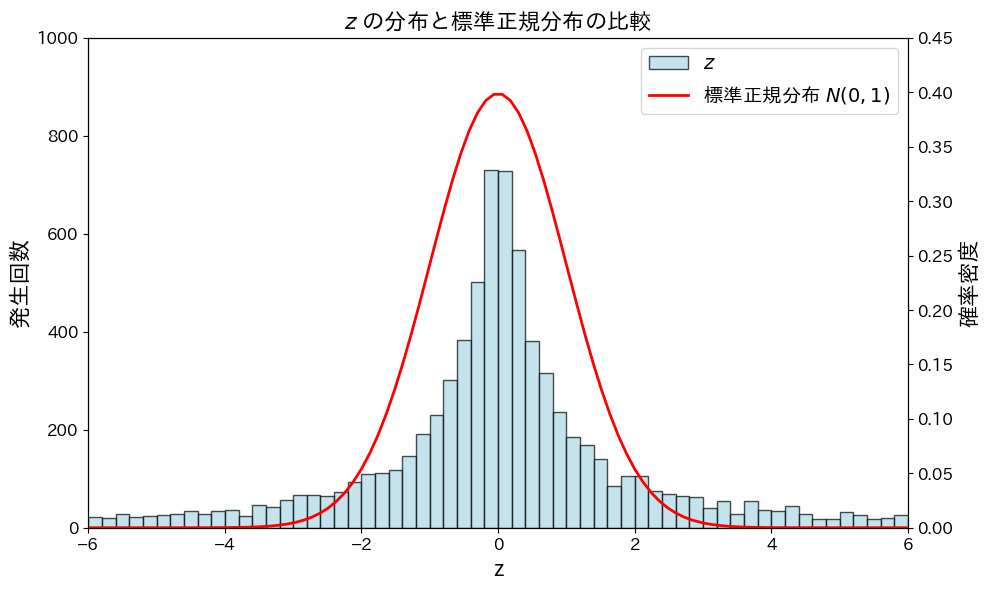

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# パラメータ設定
mu = 0
sigma = 1
n = 2
num_trials = 10000

# Z値の計算
z = []
for i in range(num_trials):
    X = np.random.normal(mu, sigma, n)
    sample_mean = np.mean(X)
    s = np.var(X, ddof=1)
    z.append((sample_mean - mu) / (s / np.sqrt(n)))

# グラフの描画設定
fig, ax1 = plt.subplots(figsize=(10, 6))

# ヒストグラム (発生回数)
hist_plot = ax1.hist(z, bins=np.arange(-6, 6 + 0.2, 0.2), color='lightblue', edgecolor='black', alpha=0.7, label=r'$z$')
ax1.set_xlabel(r'z', fontsize=16)
ax1.set_ylabel('発生回数', fontsize=16)
ax1.tick_params(axis='y')
ax1.set_xlim(-6, 6)
ax1.set_ylim(0, 1000)
ax1.tick_params(labelsize=12)

# 右側に標準正規分布の軸を追加
ax2 = ax1.twinx()  # 同じx軸を共有する2つ目のy軸
x_values = np.linspace(-6, 6, 100)
y_values = stats.norm.pdf(x_values, 0, 1)  # 標準正規分布
density_plot, = ax2.plot(x_values, y_values, color='red', linewidth=2, label=r'標準正規分布 $N(0, 1)$')

ax2.set_ylabel('確率密度', fontsize=16)
ax2.tick_params(axis='y')
ax2.set_xlim(-6, 6)
ax2.set_ylim(0, 0.45)
ax2.tick_params(labelsize=12)

# 凡例の要素をまとめる
ax2.legend(handles=[hist_plot[2][0], density_plot], loc='upper right', fontsize=14)
ax1.set_title(r'$z$ の分布と標準正規分布の比較', fontsize=16)

# グラフ表示
plt.tight_layout()
plt.show()


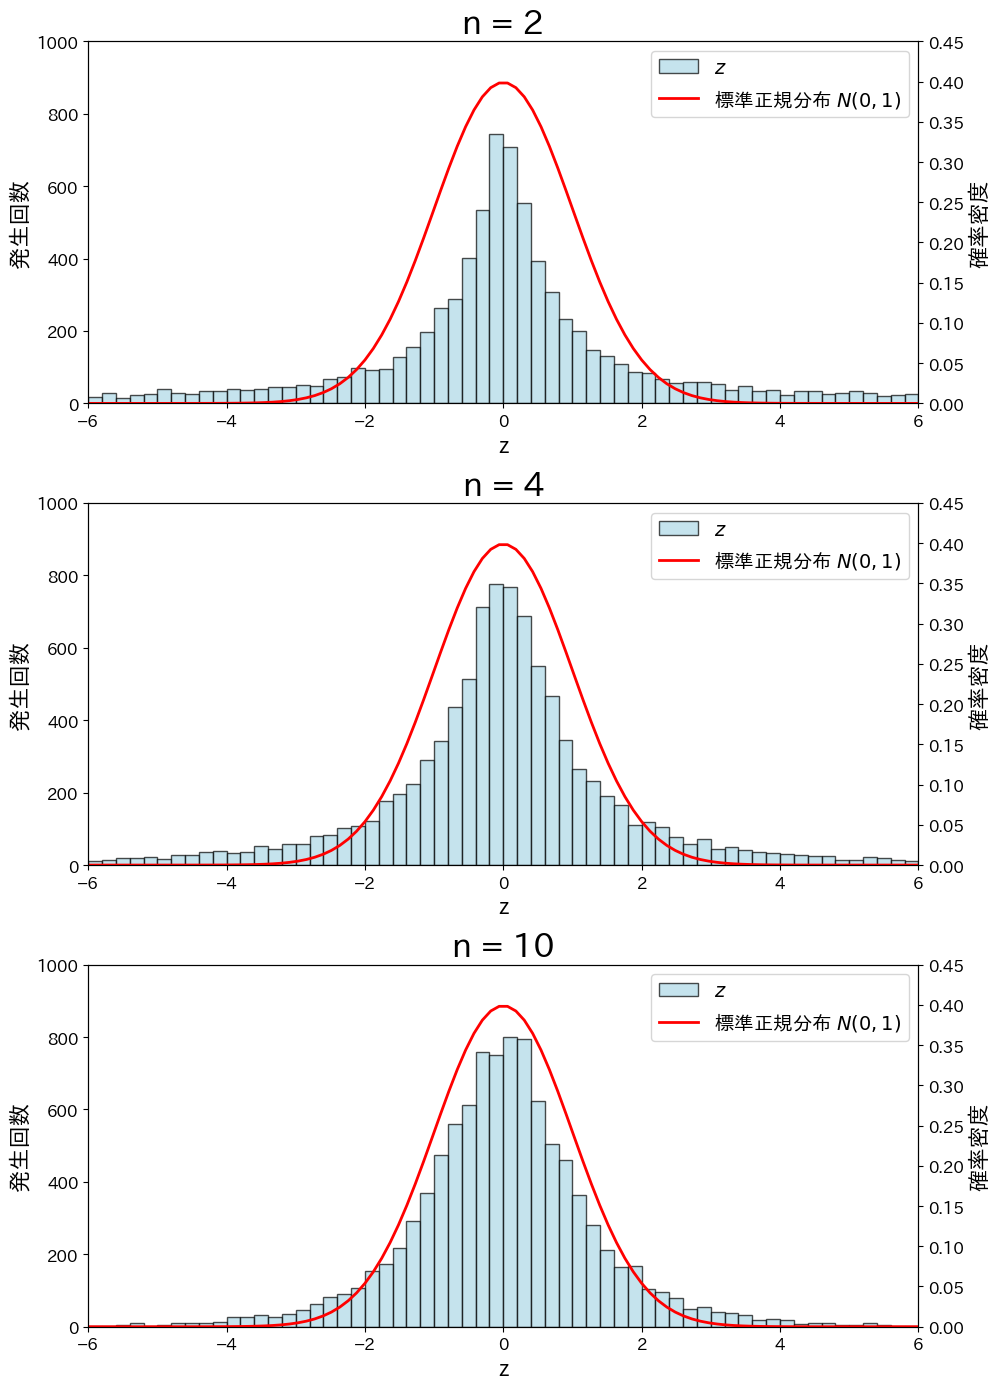

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# パラメータ設定
mu = 0
sigma = 1
num_trials = 10000

# Z値の計算とプロット描画を行う関数
def plot_z_distribution(ax1, n):
    z = []
    for i in range(num_trials):
        X = np.random.normal(mu, sigma, n)
        sample_mean = np.mean(X)
        s = np.var(X, ddof=1)
        z.append((sample_mean - mu) / (s / np.sqrt(n)))

    # ヒストグラム (発生回数)
    hist_plot = ax1.hist(z, bins=np.arange(-6, 6 + 0.2, 0.2), color='lightblue', edgecolor='black', alpha=0.7, label=r'$z$')
    ax1.set_xlabel(r'z', fontsize=16)
    ax1.set_ylabel('発生回数', fontsize=16)
    ax1.tick_params(axis='y')
    ax1.set_xlim(-6, 6)
    ax1.set_ylim(0, 1000)
    ax1.tick_params(labelsize=12)

    # 右側に標準正規分布の軸を追加
    ax2 = ax1.twinx()  # 同じx軸を共有する2つ目のy軸
    x_values = np.linspace(-6, 6, 100)
    y_values = stats.norm.pdf(x_values, 0, 1)  # 標準正規分布
    density_plot, = ax2.plot(x_values, y_values, color='red', linewidth=2, label=r'標準正規分布 $N(0, 1)$')

    ax2.set_ylabel('確率密度', fontsize=16)
    ax2.tick_params(axis='y')
    ax2.set_xlim(-6, 6)
    ax2.set_ylim(0, 0.45)
    ax2.tick_params(labelsize=12)

    # 凡例の要素をまとめる
    ax2.legend(handles=[hist_plot[2][0], density_plot], loc='upper right', fontsize=14)
    ax1.set_title(f'n = {n}', fontsize=24)

# グラフの描画設定
fig, axes = plt.subplots(3, 1, figsize=(10, 14))
fig.subplots_adjust(hspace=0.5)

# n = 2, 4, 10のグラフを縦に並べて比較
for ax, n in zip(axes, [2, 4, 10]):
    plot_z_distribution(ax, n)

plt.tight_layout()
plt.show()


### $t$ 分布

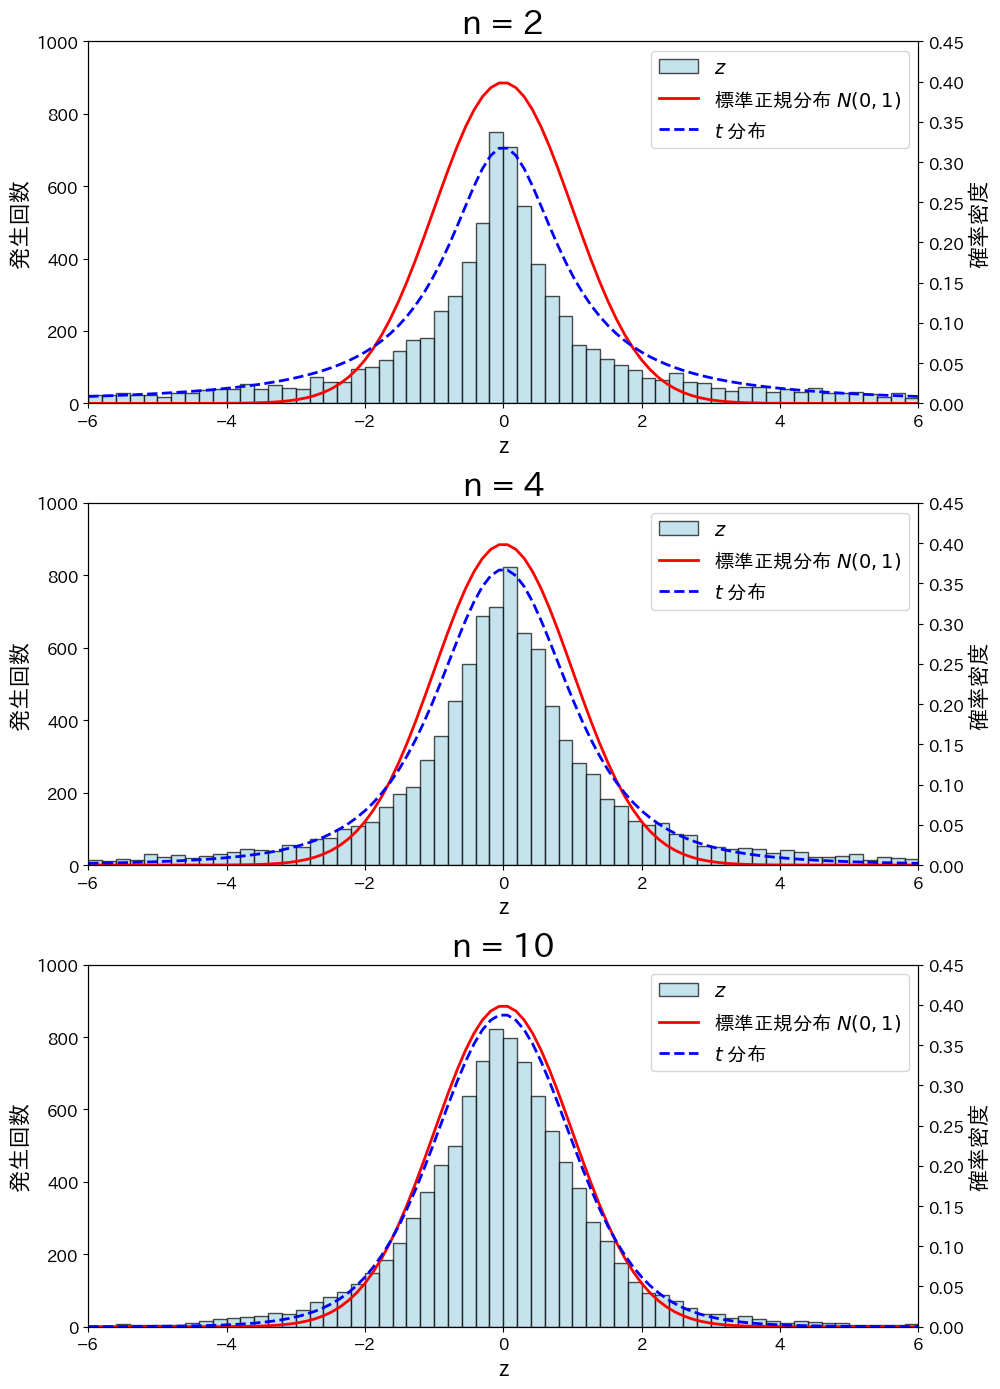

In [30]:
# Z値の計算とプロット描画を行う関数 (t分布を追加)
def plot_z_distribution_with_t(ax1, n):
    z = []
    for i in range(num_trials):
        X = np.random.normal(mu, sigma, n)
        sample_mean = np.mean(X)
        s = np.var(X, ddof=1)
        z.append((sample_mean - mu) / (s / np.sqrt(n)))

    # ヒストグラム (発生回数)
    hist_plot = ax1.hist(z, bins=np.arange(-6, 6 + 0.2, 0.2), color='lightblue', edgecolor='black', alpha=0.7, label=r'$z$')
    ax1.set_xlabel(r'z', fontsize=16)
    ax1.set_ylabel('発生回数', fontsize=16)
    ax1.tick_params(axis='y')
    ax1.set_xlim(-6, 6)
    ax1.set_ylim(0, 1000)
    ax1.tick_params(labelsize=12)

    # 右側に標準正規分布の軸を追加
    ax2 = ax1.twinx()  # 同じx軸を共有する2つ目のy軸
    x_values = np.linspace(-6, 6, 100)
    y_values = stats.norm.pdf(x_values, 0, 1)  # 標準正規分布
    y_t_values = stats.t.pdf(x_values, df=n-1)  # t分布
    density_plot, = ax2.plot(x_values, y_values, color='red', linewidth=2, label=r'標準正規分布 $N(0, 1)$')
    t_plot, = ax2.plot(x_values, y_t_values, color='blue', linewidth=2, linestyle='dashed', label=r'$t$ 分布')

    ax2.set_ylabel('確率密度', fontsize=16)
    ax2.tick_params(axis='y')
    ax2.set_xlim(-6, 6)
    ax2.set_ylim(0, 0.45)
    ax2.tick_params(labelsize=12)

    # 凡例の要素をまとめる
    ax2.legend(handles=[hist_plot[2][0], density_plot, t_plot], loc='upper right', fontsize=14)
    ax1.set_title(f'n = {n}', fontsize=24)

# グラフの描画設定
fig, axes = plt.subplots(3, 1, figsize=(10, 14))
fig.subplots_adjust(hspace=0.5)

# n = 2, 4, 10のグラフを縦に並べて比較
for ax, n in zip(axes, [2, 4, 10]):
    plot_z_distribution_with_t(ax, n)

plt.tight_layout()
plt.show()


### さまざまな $t$ 分布
$df$ の値を変化させる

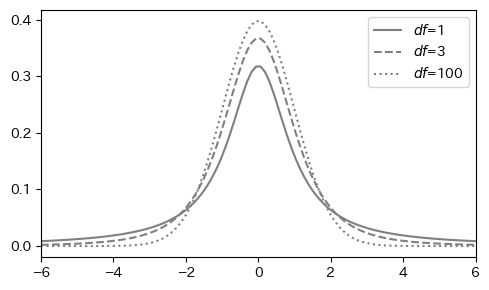

In [31]:
xs = np.linspace(-6, 6, 100)
params = [1, 3, 100]
linestyles = ['-', '--', ':']

fig, ax = plt.subplots(figsize=(5, 3))
for para, ls in zip(params, linestyles):
    rv = stats.t(para)
    ax.plot(xs, rv.pdf(xs), label='$df$='+f'{para}', ls=ls, color='gray')

ax.set_xlim(-6, 6)
ax.legend()
plt.tight_layout()
plt.show()

<span style="font-size: 20px; color: #F08000;">[例題2] 母標準偏差 σ が未知のときの μ の 95% 信頼区間</span>

無作為に選んだ成人男性の身長を測定したところ，以下の通りとなった．

<div style="display: flex;">
<div style="width: 70%;">

この標本を用いて母平均 $\mu$ の95%信頼区間を求めなさい．
なお，母標準偏差が未知であるものとする．

| サンプル  | 観測値[cm] | 
| -------- | ----- |
| $x_{1}$  | 176.6 |  
| $x_{2}$  | 169.1 | 
| $x_{3}$  | 178.2 | 
| $x_{4}$  | 169.6 | 
| $x_{5}$  | 179.1 | 
| $x_{6}$  | 165.2 | 
| $x_{7}$  | 161.8 | 
| $x_{8}$  | 174.3 | 
| $x_{9}$  | 167.6 | 
| $x_{10}$ | 171.0 | 

In [40]:
##############################
# 例題2のコードを記入
date=np.array([176.6,169.1,178.2,169.6,179.1,165.2,161.8,174.3,167.6,171.0])
n=len(date)
mean_sample=np.mean(date)
confidence_level=0.95
sample_std=np.std(date,ddof=1)
t_value=stats.t.ppf((1+confidence_level)/2,df=n-1)
se=sample_std/np.sqrt(n)
lower_bound=mean_sample-t_value*se
upper_bound=mean_sample+t_value*se
print("95%信頼区間は、約 {:.1f} cm から {:.1f} cm です".format(lower_bound, upper_bound))
##############################

95%信頼区間は、約 167.2 cm から 175.3 cm です


<span style="font-size: 20px; color: #F08000;">[問題2] 母標準偏差 σ が未知のときの μ の 95% 信頼区間</span>

ある食品を製造している会社で品質管理のために $15$ 個の製品中に含まれる成分の割合を測定したところ，その標本から求めた標本平均は $\bar{x}=20.2$%で，標本分散（不偏分散）は $s^2=0.311$ であった．
母平均の信頼係数95%の信頼区間を求めよ

In [41]:
##############################
# 問題2のコードを記入
n=15
sample_std=np.sqrt(0.311)
mean_sample=20.2
confidence_level=0.95
df=n-1
t_value=stats.t.ppf((1+confidence_level)/2,df=n-1)
se=sample_std/np.sqrt(n)
lower_bound=mean_sample-t_value*se
upper_bound=mean_sample+t_value*se
print("95%信頼区間は、約 {:.1f} % から {:.1f} % です".format(lower_bound, upper_bound))
##############################

95%信頼区間は、約 19.9 % から 20.5 % です
